# README

Before execute the code above in google colab, execute the steps of section "**Steps for run in Google Colab**". These steps will configure the execution environment in colab, with all requirements necessaries. Otherwhise, skip to section "**Library**".

# Steps for run in Google Colab

## FIRST HERE! Accessing Google Drive from Google Colab

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

## Install [python 3.8](https://stackoverflow.com/a/71512702/13976785)

### Run de commands below

In [ ]:
!apt install chromium-chromedriver
#!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.10.3-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

### Before check the current version, save the file (Ctrl+s) and reload the page (F5) and than check the current version

In [ ]:
import sys
print("User Current Version:-", sys.version)

## Move to the project directory



> **WARNING: For this step you will need to have downloaded the repository on your google drive. [How to do here](https://colab.research.google.com/drive/156ye97gzuYg4jFlL49495WQy9t-_oJnH?authuser=2#scrollTo=NNQ-wTalk-Fn).** 



In [ ]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

### Install requirements

#### Instaling project requirements

In [ ]:
!pip install -U -r requirements.txt

#### Restart [runtime](https://stackoverflow.com/a/53165687/13976785)

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# Another way, if first doesn't work
exit()

#### Move to the project folder, again

In [ ]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

# Analysis of the results of the experiments

In this file, we will analyze the results of the experiments.

# Library

In [1]:
import os
from sys import displayhook

from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mlxtend.evaluate import proportion_difference
from scipy.stats import t as t_dist

import csv_treatments

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/.venv-precoce-ms-for-jupyter-notebook/lib/python3.8/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


# Settings

In [2]:
name_folder_results = 'results'

# Path for the cross-validation results
cv_results_paths = [
    '/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/results/run_pipeline_target_categoria_binaria_lote_20042023/runs/results/GS1-cv_results-23-04-2023_01:02:04.csv'
]

# CSV Treatments

## Load dataset

In [3]:
# Load the cross-validation results
cv_results_dict = dict()
for path in cv_results_paths:
    # The key is the name of the branch
    cv_results_dict[path[len(os.getcwd()+'/'+name_folder_results+'/'):].split('/')[0]] = csv_treatments.load_data(csv_path=path)


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 1669
Número de colunas: 63
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   mean_fit_time                                    1669 non-null   float64
 1   std_fit_time                                     1669 non-null   float64
 2   mean_score_time                                  1669 non-null   float64
 3   std_score_time                                   1669 non-null   float64
 4   param_classifier__estimator                      1669 non-null   object 
 5   param_classifier__estimator__class_weight        150 non-null    object 
 6   param_classifier__estimator__criterion           252 non-null    object 
 7   param_classifier__estimator__max_dep

## Adjusting the estimator name

In [4]:
for key, df in cv_results_dict.items():
    for estimator in df['param_classifier__estimator'].unique():
        if estimator == 'DecisionTreeClassifier(random_state=42)':
            # print(df[df['param_classifier__estimator'] == estimator][['param_classifier__estimator__random_state']])
            # print(df[df['param_classifier__estimator'] == estimator].index)
            for index in df[df['param_classifier__estimator'] == estimator].index:
                df.at[index, 'param_classifier__estimator'] = 'DecisionTreeClassifier()'
                cv_results_dict[key] = df

# Results

## Total of adjustments of the parameters

In [5]:
for key, df in cv_results_dict.items():
    best_models_information_df = pd.DataFrame()
    print('Results from branch: {}'.format(key))

    for estimator in df['param_classifier__estimator'].unique():
        best_models_information_df = pd.concat([best_models_information_df, pd.DataFrame.from_records(
                        [
                            {
                                'Algoritmo': estimator[0:estimator.find('(')],
                                'Total Ajustes Parâmetros': df[df['param_classifier__estimator']==estimator].shape[0],
                                # 'Total Média Tempo Ajuste': df[df['param_classifier__estimator']==estimator]['mean_fit_time'].sum()
                            }
                        ])])
        
    displayhook(best_models_information_df)
    
    print(
        best_models_information_df.to_latex(
            index=False,
            float_format="%.2f",
            # bold_rows=True,
            column_format='cc',
        )
    )
    
    print('\n')

Results from branch: run_pipeline_target_categoria_binaria_lote_20042023


,Algoritmo,Total Ajustes Parâmetros
0,RandomForestClassifier,12
0,XGBClassifier,216
0,MLPClassifier,384
0,TabNetClassifierTuner,768
0,DecisionTreeClassifier,240
0,LinearSVC,48
0,GaussianNB,1


\begin{tabular}{cc}
\toprule
             Algoritmo &  Total Ajustes Parâmetros \\
\midrule
RandomForestClassifier &                        12 \\
         XGBClassifier &                       216 \\
         MLPClassifier &                       384 \\
 TabNetClassifierTuner &                       768 \\
DecisionTreeClassifier &                       240 \\
             LinearSVC &                        48 \\
            GaussianNB &                         1 \\
\bottomrule
\end{tabular}





/tmp/ipykernel_28262/1878539135.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best_models_information_df.to_latex(


## Summarizing the results by the cross validation splits

Results from branch: run_pipeline_target_categoria_binaria_lote_20042023


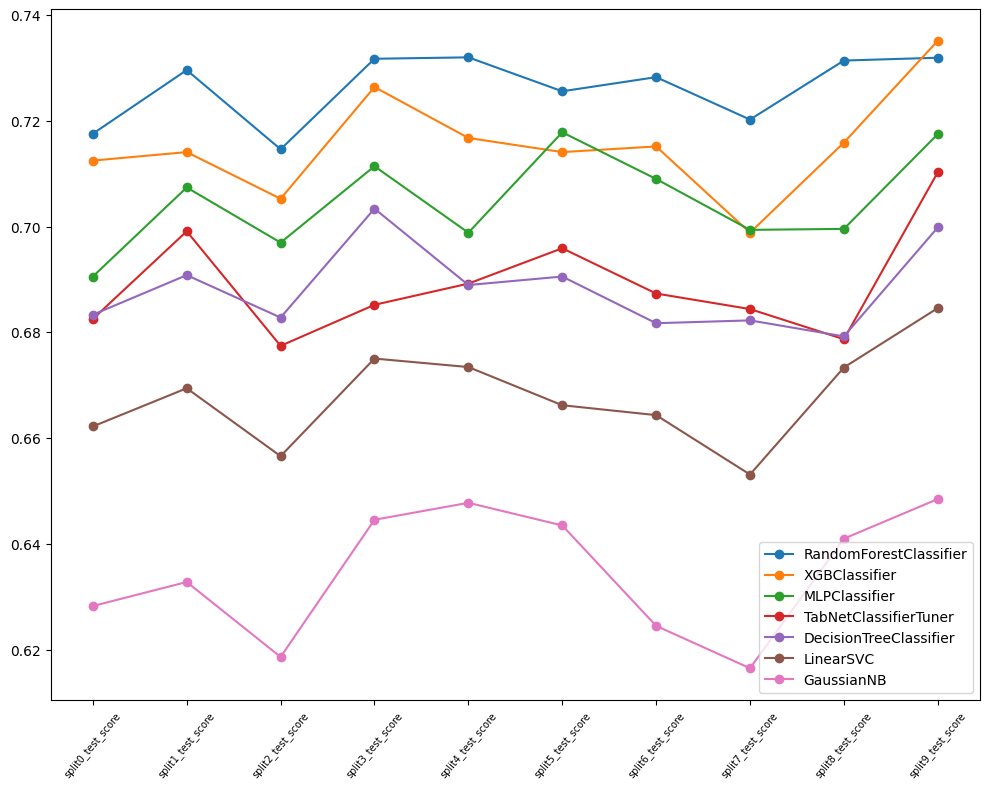

,param_classifier__estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score
0,"RandomForestClassifier(criterion='entropy', ma...",238.479627,1.196610,1.388715,0.026099,0.726303,0.006201,1
4,"XGBClassifier(base_score=None, booster=None, c...",8.200527,0.085038,0.116635,0.008632,0.715417,0.009496,5
113,MLPClassifier(),15.659661,4.091107,0.030114,0.012800,0.704852,0.008693,114
236,"TabNetClassifierTuner(n_d=8, n_a=8, n_steps=3,...",891.990270,154.412294,0.578176,0.062562,0.689018,0.009602,237
247,DecisionTreeClassifier(),0.335959,0.046865,0.029258,0.008042,0.688296,0.007677,248
732,LinearSVC(),0.356516,0.068526,0.030269,0.002574,0.667835,0.008869,733
1370,GaussianNB(),0.103985,0.016307,0.037290,0.011398,0.634589,0.011465,1371


In [6]:
for key, df in cv_results_dict.items():
    best_models_information_df = pd.DataFrame()
    print('Results from branch: {}'.format(key))
    # displayhook(df)
    x = list()
    aux = 0
    for column in df.columns:
        if column.find('split{}_test_score'.format(aux)) != -1:
            x.append('split{}_test_score'.format(aux))
            aux += 1
    
    
    plt.figure(figsize=(10, 8))


    # displayhook(df['param_classifier__estimator'].unique())
    for estimator in df['param_classifier__estimator'].unique():
    
        
        # displayhook(df[df['param_classifier__estimator']==estimator][0:1])
        best_models_information_df = pd.concat(
            [
                best_models_information_df, 
                df[df['param_classifier__estimator']==estimator][0:1][['param_classifier__estimator', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_test_score', 'std_test_score', 'rank_test_score']]
            ], 
            axis=0)
        y = list()
        for split_column in x:
            y.append(df[df['param_classifier__estimator']==estimator][0:1][split_column].values[0])

        plt.plot(x, y, label = estimator[0:estimator.find('(')], marker='o')

    plt.xticks(rotation=50, fontsize=7)
    plt.tight_layout()
    plt.legend()
    plt.show()
    plt.close()
    
    displayhook(best_models_information_df)
    
    print('\n')

## Showing means and standard deviations of the results by each best estimator

Results from branch: run_pipeline_target_categoria_binaria_lote_20042023

Model hiperparameters:
{'classifier__estimator': RandomForestClassifier(criterion='entropy', max_features=0.75,
                       n_estimators=1000, n_jobs=1, random_state=42), 'classifier__estimator__class_weight': None, 'classifier__estimator__criterion': 'entropy', 'classifier__estimator__max_depth': None, 'classifier__estimator__max_features': 0.75, 'classifier__estimator__n_estimators': 1000, 'classifier__estimator__n_jobs': 1, 'classifier__estimator__random_state': 42}

Model hiperparameters:
{'classifier__estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max

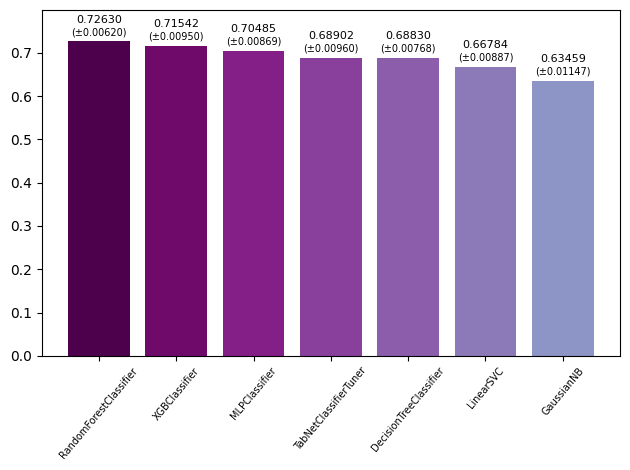

,Modelo,Hiperparâmetros,Média Pontuação Acurácia
0,RandomForestClassifier,{'classifier__estimator': RandomForestClassifi...,0.72630 (±0.00620)
0,XGBClassifier,{'classifier__estimator': XGBClassifier(base_s...,0.71542 (±0.00950)
0,MLPClassifier,"{'classifier__estimator': MLPClassifier(), 'cl...",0.70485 (±0.00869)
0,TabNetClassifierTuner,{'classifier__estimator': TabNetClassifierTune...,0.68902 (±0.00960)
0,DecisionTreeClassifier,{'classifier__estimator': DecisionTreeClassifi...,0.68830 (±0.00768)
0,LinearSVC,"{'classifier__estimator': LinearSVC(), 'classi...",0.66784 (±0.00887)
0,GaussianNB,{'classifier__estimator': GaussianNB()},0.63459 (±0.01147)


\begin{tabular}{ccc}
\toprule
                Modelo &                                    Hiperparâmetros & Média Pontuação Acurácia \\
\midrule
RandomForestClassifier & \{'classifier\_\_estimator': RandomForestClassifie... &       0.72630 (±0.00620) \\
         XGBClassifier & \{'classifier\_\_estimator': XGBClassifier(base\_sc... &       0.71542 (±0.00950) \\
         MLPClassifier & \{'classifier\_\_estimator': MLPClassifier(), 'cla... &       0.70485 (±0.00869) \\
 TabNetClassifierTuner & \{'classifier\_\_estimator': TabNetClassifierTuner... &       0.68902 (±0.00960) \\
DecisionTreeClassifier & \{'classifier\_\_estimator': DecisionTreeClassifie... &       0.68830 (±0.00768) \\
             LinearSVC & \{'classifier\_\_estimator': LinearSVC(), 'classif... &       0.66784 (±0.00887) \\
            GaussianNB &            \{'classifier\_\_estimator': GaussianNB()\} &       0.63459 (±0.01147) \\
\bottomrule
\end{tabular}





/tmp/ipykernel_14271/2795036395.py:43: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best_models_information_df.to_latex(


In [5]:
for key, df in cv_results_dict.items():
    best_models_information_df = pd.DataFrame()
    print('Results from branch: {}'.format(key))
    
    x = list()
    y = list()
    std_test_score = list()
    
    for estimator in df['param_classifier__estimator'].unique():
        best_models_information_df = pd.concat([best_models_information_df, pd.DataFrame.from_records(
                        [
                            {
                                'Modelo': estimator[0:estimator.find('(')],
                                'Hiperparâmetros': df[df['param_classifier__estimator']==estimator][0:1]['params'].values[0],
                                'Média Pontuação Acurácia': '{:.5f} (±{:.5f})'.format(df[df['param_classifier__estimator']==estimator][0:1]['mean_test_score'].values[0], df[df['param_classifier__estimator']==estimator][0:1]['std_test_score'].values[0])
                            }
                        ])])
        
        print('\nModel hiperparameters:')
        print(df[df['param_classifier__estimator']==estimator][0:1]['params'].values[0])
        
        x.append(estimator[0:estimator.find('(')])
        y.append(df[df['param_classifier__estimator']==estimator][0:1]['mean_test_score'].values[0])
        std_test_score.append(round(df[df['param_classifier__estimator']==estimator][0:1]['std_test_score'].values[0], 5))
    
    colors = plt.cm.BuPu(np.linspace(1, 0.5, len(x)))
    
    a = plt.bar(x, y, color=colors)

    plt.bar_label(a, padding=12, fmt='%.5f', fontsize=8)
    plt.bar_label(a, labels=['(±%.5f)' % std for std in std_test_score], padding=3, fontsize=7)
    
    plt.ylim(0, y[np.argmax(y)]+(y[np.argmax(y)]*0.1))
    plt.xticks(rotation=50, fontsize=7)
    plt.tight_layout()
    # plt.legend()
    plt.show()
    plt.close()
    
    displayhook(best_models_information_df)
    
    print(
        best_models_information_df.to_latex(
            index=False,
            float_format="%.2f",
            # bold_rows=True,
            column_format='ccc',
        )
    )
    
    print('\n')

In [7]:
# Standard deviation overlap
# Overlap Coefficient = (2 * min(σ1, σ2)) / (μ1 - μ2 + 2 * min(σ1, σ2))

# where:

# σ1 and σ2 are the standard deviations of the two distributions
# μ1 and μ2 are the means of the two distributions

displayhook( (2*min(0.00620, 0.00869)) / (0.72630-0.70485 + 2*min(0.00620, 0.00869)) )

0.36632200886262956

## Mean of the adjustments time

Results from branch: run_pipeline_target_categoria_binaria_lote_20042023


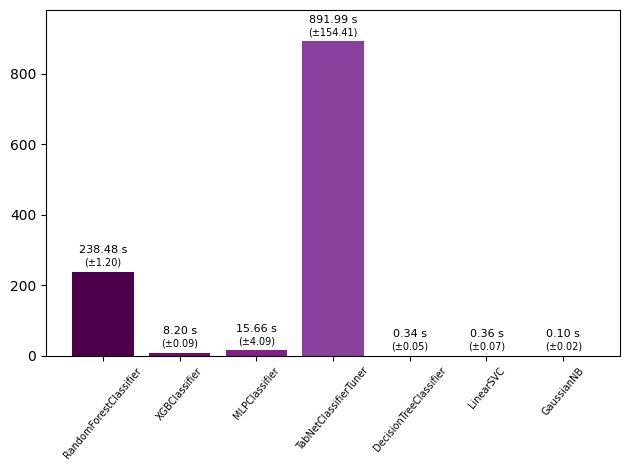

,Modelo,Média Tempo Ajuste
0,RandomForestClassifier,238.48 s (±1.20)
0,XGBClassifier,8.20 s (±0.09)
0,MLPClassifier,15.66 s (±4.09)
0,TabNetClassifierTuner,891.99 s (±154.41)
0,DecisionTreeClassifier,0.34 s (±0.05)
0,LinearSVC,0.36 s (±0.07)
0,GaussianNB,0.10 s (±0.02)


\begin{tabular}{cc}
\toprule
                Modelo & Média Tempo Ajuste \\
\midrule
RandomForestClassifier &   238.48 s (±1.20) \\
         XGBClassifier &     8.20 s (±0.09) \\
         MLPClassifier &    15.66 s (±4.09) \\
 TabNetClassifierTuner & 891.99 s (±154.41) \\
DecisionTreeClassifier &     0.34 s (±0.05) \\
             LinearSVC &     0.36 s (±0.07) \\
            GaussianNB &     0.10 s (±0.02) \\
\bottomrule
\end{tabular}





/tmp/ipykernel_14271/1093270513.py:39: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best_models_information_df.to_latex(


In [11]:
for key, df in cv_results_dict.items():
    best_models_information_df = pd.DataFrame()
    print('Results from branch: {}'.format(key))
    
    x = list()
    y = list()
    std_test_score = list()
    
    for estimator in df['param_classifier__estimator'].unique():
        best_models_information_df = pd.concat([best_models_information_df, pd.DataFrame.from_records(
                        [
                            {
                                'Modelo': estimator[0:estimator.find('(')],
                                'Média Tempo Ajuste': '{:.2f} s (±{:.2f})'.format(df[df['param_classifier__estimator']==estimator][0:1]['mean_fit_time'].values[0], df[df['param_classifier__estimator']==estimator][0:1]['std_fit_time'].values[0])
                            }
                        ])])
        
        x.append(estimator[0:estimator.find('(')])
        y.append(df[df['param_classifier__estimator']==estimator][0:1]['mean_fit_time'].values[0])
        std_test_score.append(df[df['param_classifier__estimator']==estimator][0:1]['std_fit_time'].values[0])
    
    colors = plt.cm.BuPu(np.linspace(1, 0.5, len(x)))
    
    a = plt.bar(x, y, color=colors)

    plt.bar_label(a, fmt='%.2f s', padding=12, fontsize=8)
    plt.bar_label(a, labels=['(±%.2f)' % std for std in std_test_score], padding=3, fontsize=7)
    
    plt.ylim(0, y[np.argmax(y)]+(y[np.argmax(y)]*0.1))
    plt.xticks(rotation=50, fontsize=7)
    plt.tight_layout()
    # plt.legend()
    plt.show()
    plt.close()
    
    displayhook(best_models_information_df)
    
    print(
        best_models_information_df.to_latex(
            index=False,
            float_format="%.2f",
            # bold_rows=True,
            column_format='cc',
        )
    )
    
    print('\n')

## Mean of the score time

Results from branch: run_pipeline_target_categoria_binaria_lote_20042023


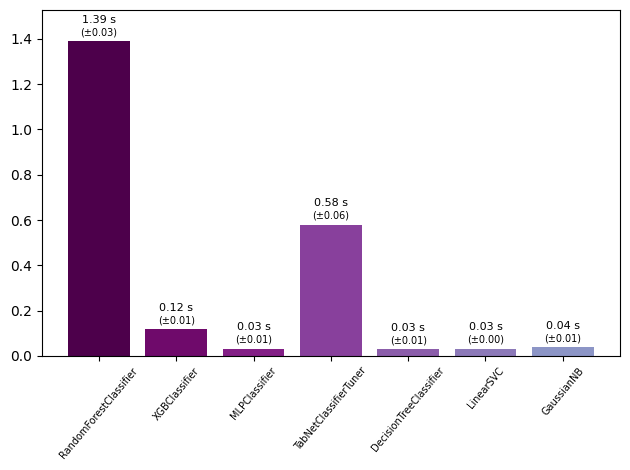

,Modelo,Média Tempo Avaliação
0,RandomForestClassifier,1.39 s (±0.03)
0,XGBClassifier,0.12 s (±0.01)
0,MLPClassifier,0.03 s (±0.01)
0,TabNetClassifierTuner,0.58 s (±0.06)
0,DecisionTreeClassifier,0.03 s (±0.01)
0,LinearSVC,0.03 s (±0.00)
0,GaussianNB,0.04 s (±0.01)


In [10]:
for key, df in cv_results_dict.items():
    best_models_information_df = pd.DataFrame()
    print('Results from branch: {}'.format(key))
    
    x = list()
    y = list()
    std_test_score = list()
    
    for estimator in df['param_classifier__estimator'].unique():
        best_models_information_df = pd.concat([best_models_information_df, pd.DataFrame.from_records(
                        [
                            {
                                'Modelo': estimator[0:estimator.find('(')],
                                'Média Tempo Avaliação': '{:.2f} s (±{:.2f})'.format(df[df['param_classifier__estimator']==estimator][0:1]['mean_score_time'].values[0], df[df['param_classifier__estimator']==estimator][0:1]['std_score_time'].values[0])
                            }
                        ])])
        
        x.append(estimator[0:estimator.find('(')])
        y.append(df[df['param_classifier__estimator']==estimator][0:1]['mean_score_time'].values[0])
        std_test_score.append(df[df['param_classifier__estimator']==estimator][0:1]['std_score_time'].values[0])
    
    colors = plt.cm.BuPu(np.linspace(1, 0.5, len(x)))
    
    a = plt.bar(x, y, color=colors)

    plt.bar_label(a, fmt='%.2f s', padding=12, fontsize=8)
    plt.bar_label(a, labels=['(±%.2f)' % std for std in std_test_score], padding=3, fontsize=7)
    
    plt.ylim(0, y[np.argmax(y)]+(y[np.argmax(y)]*0.1))
    plt.xticks(rotation=50, fontsize=7)
    plt.tight_layout()
    # plt.legend()
    plt.show()
    plt.close()
    
    displayhook(best_models_information_df)
    
    print('\n')

## Mean fit time by accuracy

Results from branch: run_pipeline_target_categoria_binaria_lote_20042023


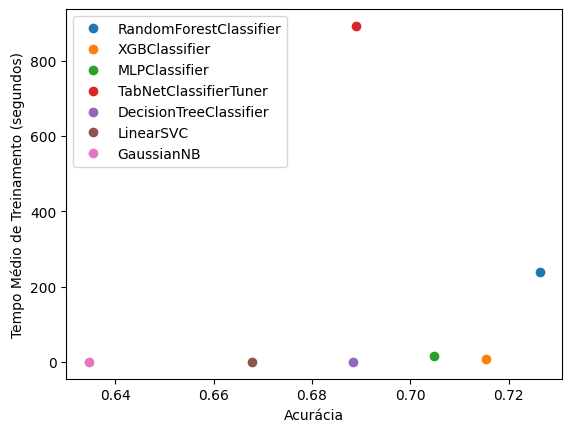

,Modelo,Média Tempo Ajuste,Média Pontuação Acurácia
0,RandomForestClassifier,238.48 s (±1.20),0.72630 (±0.00620)
0,XGBClassifier,8.20 s (±0.09),0.71542 (±0.00950)
0,MLPClassifier,15.66 s (±4.09),0.70485 (±0.00869)
0,TabNetClassifierTuner,891.99 s (±154.41),0.68902 (±0.00960)
0,DecisionTreeClassifier,0.34 s (±0.05),0.68830 (±0.00768)
0,LinearSVC,0.36 s (±0.07),0.66784 (±0.00887)
0,GaussianNB,0.10 s (±0.02),0.63459 (±0.01147)


In [5]:
for key, df in cv_results_dict.items():
    best_models_information_df = pd.DataFrame()
    print('Results from branch: {}'.format(key))
    
    for estimator in df['param_classifier__estimator'].unique():
        best_models_information_df = pd.concat([best_models_information_df, pd.DataFrame.from_records(
                        [
                            {
                                'Modelo': estimator[0:estimator.find('(')],
                                'Média Tempo Ajuste': '{:.2f} s (±{:.2f})'.format(df[df['param_classifier__estimator']==estimator][0:1]['mean_fit_time'].values[0], df[df['param_classifier__estimator']==estimator][0:1]['std_fit_time'].values[0]),
                                'Média Pontuação Acurácia': '{:.5f} (±{:.5f})'.format(df[df['param_classifier__estimator']==estimator][0:1]['mean_test_score'].values[0], df[df['param_classifier__estimator']==estimator][0:1]['std_test_score'].values[0])
                            }
                        ])])
    
        plt.plot(
            df[df['param_classifier__estimator']==estimator][0:1]['mean_test_score'].values[0], 
            df[df['param_classifier__estimator']==estimator][0:1]['mean_fit_time'].values[0],
            'o',
            label=estimator[0:estimator.find('(')]
        )
    plt.legend()
    plt.xlabel('Acurácia')
    plt.ylabel('Tempo Médio de Treinamento (segundos)')
    # plt.tight_layout()
    plt.show()
    plt.close()
    
    displayhook(best_models_information_df)
    
    print('\n')

## Classification report

In [5]:
classification_report = csv_treatments.load_data(csv_path='/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification/results/run_pipeline_target_categoria_binaria_lote_20042023/runs/results/GS1-classification_report-23-04-2023_01:02:32.csv')
classification_report


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 1
Número de colunas: 2
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   classification_report_str   1 non-null      object
 1   classification_report_dict  1 non-null      object
dtypes: object(2)
memory usage: 1.1 KB
*****FIM PRINT INFOS*********
Function informations Took 0:00:00.013385

*****FIM LOAD DATA******
Function load_data Took 0:00:00.019135



,classification_report_str,classification_report_dict
0,[' precision recall f1-score ...,"[{'0': {'precision': 0.7254658385093168, 'reca..."


In [6]:
print(classification_report['classification_report_dict'][0].replace('[', '').replace(']', '').replace('\'', ''))

{0: {precision: 0.7254658385093168, recall: 0.7474402730375427, f1-score: 0.7362891363731876, support: 4688}, 1: {precision: 0.7379371403275786, recall: 0.715450643776824, f1-score: 0.7265199389845283, support: 4660}, accuracy: 0.7314933675652546, macro avg: {precision: 0.7317014894184477, recall: 0.7314454584071833, f1-score: 0.7314045376788579, support: 9348}, weighted avg: {precision: 0.7316828118162381, recall: 0.7314933675652546, f1-score: 0.7314191684836762, support: 9348}}


In [7]:
classification_report_from_dict = pd.DataFrame.from_dict(
    {
        0: 
            {
                'precisão': 0.7254658385093168,
                'revocação': 0.7474402730375427,
                'f1-score': 0.7362891363731876,
                'suporte': 4688
            },
        1: {
                'precisão': 0.7379371403275786,
                'revocação': 0.715450643776824,
                'f1-score': 0.7265199389845283,
                'suporte': 4660
            },
        'acurácia': 0.7314933675652546,
        'macro avg': 
            {
                'precisão': 0.7317014894184477,
                'revocação': 0.7314454584071833,
                'f1-score': 0.7314045376788579,
                'suporte': 9348
            },
        'micro avg':
            {
                'precisão': 0.7314933675652546,
                'revocação': 0.7314933675652546,
                'f1-score': 0.7314933675652545,
                'suporte': 9348
            }
    })

displayhook(classification_report_from_dict.T)

print(
        classification_report_from_dict.T.to_latex(
            index=True,
            float_format="%.2f",
            # bold_rows=True,
            column_format='ccccc',
        )
    )

,precisão,revocação,f1-score,suporte
0,0.725466,0.747440,0.736289,4688.000000
1,0.737937,0.715451,0.726520,4660.000000
acurácia,0.731493,0.731493,0.731493,0.731493
macro avg,0.731701,0.731445,0.731405,9348.000000
micro avg,0.731493,0.731493,0.731493,9348.000000


\begin{tabular}{ccccc}
\toprule
{} &  precisão &  revocação &  f1-score &  suporte \\
\midrule
0         &      0.73 &       0.75 &      0.74 &  4688.00 \\
1         &      0.74 &       0.72 &      0.73 &  4660.00 \\
acurácia  &      0.73 &       0.73 &      0.73 &     0.73 \\
macro avg &      0.73 &       0.73 &      0.73 &  9348.00 \\
micro avg &      0.73 &       0.73 &      0.73 &  9348.00 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_14335/1326118963.py:36: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  classification_report_from_dict.T.to_latex(


## Best attributes of the best estimator

In [8]:
import utils

best_estimator = utils.load_object(file_path='/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/documentos_dissertacao/algoritmos/precoce-ms-classification-api/serialized_files/model/best_estimator-RandomForestClassifier-23-04-2023_01:02:09.joblib')

best_estimator

RandomForestClassifier(criterion='entropy', max_features=0.75,
                       n_estimators=1000, n_jobs=1, random_state=42)

In [9]:
best_estimator.feature_importances_

array([0.01721515, 0.03551617, 0.0143264 , 0.00747421, 0.11093538,
       0.16311844, 0.11348288, 0.11723554, 0.08146547, 0.08917145,
       0.09307088, 0.01105505, 0.00615072, 0.00380726, 0.00442548,
       0.01497433, 0.01129792, 0.01377731, 0.01161956, 0.00993327,
       0.01136471, 0.03601569, 0.00885226, 0.01371449])

In [12]:
best_estimator.n_features_in_

24

In [10]:
for i, v in enumerate(best_estimator.feature_importances_):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01722
Feature: 1, Score: 0.03552
Feature: 2, Score: 0.01433
Feature: 3, Score: 0.00747
Feature: 4, Score: 0.11094
Feature: 5, Score: 0.16312
Feature: 6, Score: 0.11348
Feature: 7, Score: 0.11724
Feature: 8, Score: 0.08147
Feature: 9, Score: 0.08917
Feature: 10, Score: 0.09307
Feature: 11, Score: 0.01106
Feature: 12, Score: 0.00615
Feature: 13, Score: 0.00381
Feature: 14, Score: 0.00443
Feature: 15, Score: 0.01497
Feature: 16, Score: 0.01130
Feature: 17, Score: 0.01378
Feature: 18, Score: 0.01162
Feature: 19, Score: 0.00993
Feature: 20, Score: 0.01136
Feature: 21, Score: 0.03602
Feature: 22, Score: 0.00885
Feature: 23, Score: 0.01371


Len features names: 24


,features_names,features_importances
13,Confinamento,0.003807
14,Suplementacao_a_campo,0.004425
12,QuestionarioPraticaRecuperacaoPa,0.006151
3,ILP,0.007474
22,Tipificacao_Macho Castrado,0.008852
19,med3m_preR_milho,0.009933
11,participa de aliancas mercadolog,0.011055
16,tot3m_Chuva,0.011298
20,med3m_preR_boi,0.011365
18,med3m_NDVI,0.011620


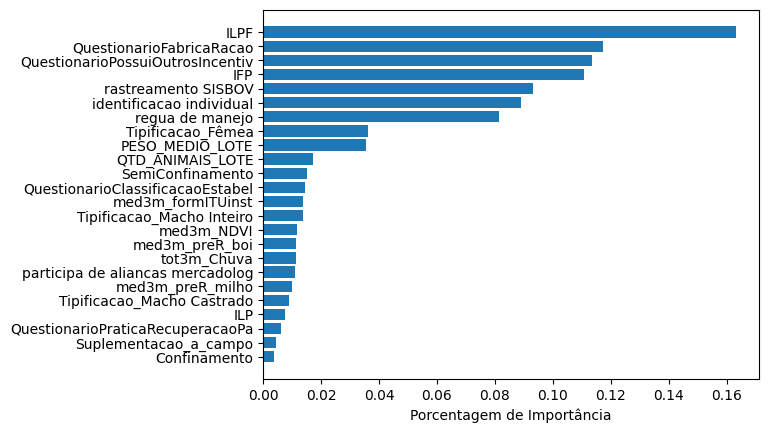

In [25]:
features_names = [
        'QTD_ANIMAIS_LOTE', 'PESO_MEDIO_LOTE', 'QuestionarioClassificacaoEstabel',
        'ILP', 'IFP', 'ILPF', 'QuestionarioPossuiOutrosIncentiv', 'QuestionarioFabricaRacao', 'regua de manejo',
        'identificacao individual', 'rastreamento SISBOV', 'participa de aliancas mercadolog',
        'QuestionarioPraticaRecuperacaoPa', 'Confinamento', 'Suplementacao_a_campo', 'SemiConfinamento',
        'tot3m_Chuva', 'med3m_formITUinst', 'med3m_NDVI', 'med3m_preR_milho', 'med3m_preR_boi',
        'Tipificacao_Fêmea', 'Tipificacao_Macho Castrado', 'Tipificacao_Macho Inteiro'
    ]

print('Len features names: {}'.format(len(features_names)))

features_importances = pd.DataFrame.from_dict(
    {
        'features_names': features_names,
        'features_importances': best_estimator.feature_importances_
    }
).sort_values(by='features_importances', ascending=True)

displayhook(features_importances)

plt.barh(features_importances['features_names'], features_importances['features_importances'])
plt.xlabel('Porcentagem de Importância')
plt.show()
plt.close()

## Proportions z-test

In [15]:
# Large dataset
# x_train shape: (2378460, 30)
# y_train shape: (2378460,)
# x_test shape: (594616, 30)
# y_test shape: (594616,)

# Batch dataset
# x_train shape: (37388, 22)
# y_train shape: (37388,)
# x_test shape: (9348, 22)
# y_test shape: (9348,)

print("Proportions Z-Test\n\n")

for key, df in cv_results_dict.items():
    print('Results from branch: {}'.format(key))
    
    len_y_test_cv = int
    if key == 'run_pipeline_target_categoria_binaria_lote_20042023':
        len_y_test_cv = 37388/10
    else:
        len_y_test_cv = 2378460/10

    best_models_information_df = pd.DataFrame(columns=['Modelo 1', 'Modelo 2', 'Média Pontuação 1', 'Média Pontuação 2', 'Z-test', 'p-value'])
    for estimator1 in df['param_classifier__estimator'].unique():
        estimator1_full_name = estimator1
        estimator1 = estimator1[0:estimator1.find('(')]
        
        for estimator2 in df['param_classifier__estimator'].unique():
            estimator2_full_name = estimator2
            estimator2 = estimator2[0:estimator2.find('(')]
            
            if estimator1 == estimator2:
                continue
            
            if best_models_information_df[
                    (best_models_information_df['Modelo 1'] == estimator1) & (best_models_information_df['Modelo 2'] == estimator2)
                ].empty and best_models_information_df[
                    (best_models_information_df['Modelo 1'] == estimator2) & (best_models_information_df['Modelo 2'] == estimator1)
                ].empty:
                    z, p = proportion_difference(
                            df[df['param_classifier__estimator']==estimator1_full_name][0:1]['mean_test_score'].values[0], 
                            df[df['param_classifier__estimator']==estimator2_full_name][0:1]['mean_test_score'].values[0], 
                            n_1=len_y_test_cv
                        )
                    best_models_information_df = pd.concat([best_models_information_df, pd.DataFrame.from_records(
                        [
                            {
                                'Modelo 1': estimator1,
                                'Modelo 2': estimator2,
                                'Média Pontuação 1': df[df['param_classifier__estimator']==estimator1_full_name][0:1]['mean_test_score'].values[0],
                                'Média Pontuação 2': df[df['param_classifier__estimator']==estimator2_full_name][0:1]['mean_test_score'].values[0],
                                'Z-test': z,
                                'p-value': p
                            }
                        ])])

    displayhook(best_models_information_df)
    
    print('\n')

Proportions Z-Test


Results from branch: run_pipeline_target_categoria_binaria_lote_20042023


,Modelo 1,Modelo 2,Média Pontuação 1,Média Pontuação 2,Z-test,p-value
0,RandomForestClassifier,XGBClassifier,0.726303,0.715417,1.049298,0.852979
0,RandomForestClassifier,MLPClassifier,0.726303,0.704852,2.056400,0.980128
0,RandomForestClassifier,TabNetClassifierTuner,0.726303,0.689018,3.547239,0.999805
0,RandomForestClassifier,DecisionTreeClassifier,0.726303,0.688296,3.614774,0.999850
0,RandomForestClassifier,LinearSVC,0.726303,0.667835,5.512361,1.000000
0,RandomForestClassifier,GaussianNB,0.726303,0.634589,8.545283,1.000000
0,XGBClassifier,MLPClassifier,0.715417,0.704852,1.006911,0.843011
0,XGBClassifier,TabNetClassifierTuner,0.715417,0.689018,2.497099,0.993739
0,XGBClassifier,DecisionTreeClassifier,0.715417,0.688296,2.564593,0.994835
0,XGBClassifier,LinearSVC,0.715417,0.667835,4.460637,0.999996


## T-test

In [11]:
#TODO: https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/ and https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

print("Cross Validated Paired t-test\n\n")

def paired_t_test(p):
    p_hat = np.mean(p)
    n = len(p)
    den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
    t = (p_hat * (n**(1/2))) / den
    
    p_value = t_dist.sf(t, n-1)*2
    
    return t, p_value

for key, df in cv_results_dict.items():
    print('Results from branch: {}'.format(key))

    best_models_information_df = pd.DataFrame(columns=['Algoritmo 1', 'Algoritmo 2', 'Estátistica t', 'Valor p'])
    for estimator1 in df['param_classifier__estimator'].unique():
        estimator1_full_name = estimator1
        estimator1 = estimator1[0:estimator1.find('(')]
        
        for estimator2 in df['param_classifier__estimator'].unique():
            estimator2_full_name = estimator2
            estimator2 = estimator2[0:estimator2.find('(')]
            
            if estimator1 == estimator2:
                continue
            
            if best_models_information_df[
                    (best_models_information_df['Algoritmo 1'] == estimator1) & (best_models_information_df['Algoritmo 2'] == estimator2)
                ].empty and best_models_information_df[
                    (best_models_information_df['Algoritmo 1'] == estimator2) & (best_models_information_df['Algoritmo 2'] == estimator1)
                ].empty:
                    p_ = df[df['param_classifier__estimator']==estimator1_full_name][0:1][
                        ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
                        'split4_test_score', 'split5_test_score', 'split6_test_score',
                        'split7_test_score', 'split8_test_score', 'split9_test_score']
                        ].values[0] - df[df['param_classifier__estimator']==estimator2_full_name][0:1][
                        ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
                        'split4_test_score', 'split5_test_score', 'split6_test_score',
                        'split7_test_score', 'split8_test_score', 'split9_test_score']
                        ].values[0]
                    
                    t, p = paired_t_test(p_)
                    best_models_information_df = pd.concat([best_models_information_df, pd.DataFrame.from_records(
                        [
                            {
                                'Algoritmo 1': estimator1,
                                'Algoritmo 2': estimator2,
                                'Estátistica t': t,
                                'Valor p': p
                            }
                        ])])

    displayhook(best_models_information_df)
    
    print(
        best_models_information_df.to_latex(
            index=False,
            float_format="%.5f",
            # bold_rows=True,
            column_format='cccc',
        )
    )
    
    print('\n')

Cross Validated Paired t-test


Results from branch: run_pipeline_target_categoria_binaria_lote_20042023


,Algoritmo 1,Algoritmo 2,Estátistica t,Valor p
0,RandomForestClassifier,XGBClassifier,4.906583,0.000840
0,RandomForestClassifier,MLPClassifier,8.806364,0.000010
0,RandomForestClassifier,TabNetClassifierTuner,13.166273,0.000000
0,RandomForestClassifier,DecisionTreeClassifier,16.309298,0.000000
0,RandomForestClassifier,LinearSVC,35.420466,0.000000
0,RandomForestClassifier,GaussianNB,36.153658,0.000000
0,XGBClassifier,MLPClassifier,3.919939,0.003511
0,XGBClassifier,TabNetClassifierTuner,9.491754,0.000006
0,XGBClassifier,DecisionTreeClassifier,13.203121,0.000000
0,XGBClassifier,LinearSVC,45.692634,0.000000


\begin{tabular}{cccc}
\toprule
           Algoritmo 1 &            Algoritmo 2 &  Estátistica t &  Valor p \\
\midrule
RandomForestClassifier &          XGBClassifier &        4.90658 &  0.00084 \\
RandomForestClassifier &          MLPClassifier &        8.80636 &  0.00001 \\
RandomForestClassifier &  TabNetClassifierTuner &       13.16627 &  0.00000 \\
RandomForestClassifier & DecisionTreeClassifier &       16.30930 &  0.00000 \\
RandomForestClassifier &              LinearSVC &       35.42047 &  0.00000 \\
RandomForestClassifier &             GaussianNB &       36.15366 &  0.00000 \\
         XGBClassifier &          MLPClassifier &        3.91994 &  0.00351 \\
         XGBClassifier &  TabNetClassifierTuner &        9.49175 &  0.00001 \\
         XGBClassifier & DecisionTreeClassifier &       13.20312 &  0.00000 \\
         XGBClassifier &              LinearSVC &       45.69263 &  0.00000 \\
         XGBClassifier &             GaussianNB &       35.76567 &  0.00000 \\
         MLP

/tmp/ipykernel_13645/2299803356.py:59: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best_models_information_df.to_latex(
